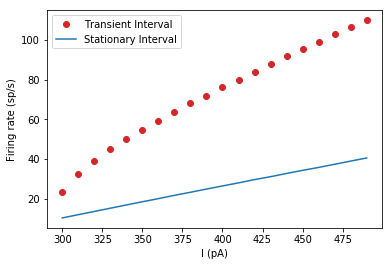

In [3]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex. tools import input_factory, plot_tools
from brian2 import *

# Descrição dos parâmetros do modelo

Cm = 100*b2.pF # capacitância da membrana
Rm = 100*Mohm # resistência da membrana
El = -75*mV # potencial de equilíbrio da membrana
Vl = -50*mV # valor limiar de tensão de emissão de disparo
vr = -80*mV # valor de tensão de repouso após 'resetagem'
Ek = -80*mV # potencial de equilíbrio da membrana
tau_Ga = 200*ms
duration = 5000*ms
delta_Ga = 1*nsiemens
Ga_0 = 0*b2.nsiemens
current = np.arange(300,500,10)

# Modelo Neurônio
start_scope()
eqs = """
dGa/dt = -Ga/tau_Ga : siemens
dv/dt =
( ( (El-v)/(Cm * Rm) ) + (Ga *(Ek - v))/Cm + (current/Cm) ) : volt
current : amp
"""
G = b2.NeuronGroup(
    len(current), model=eqs, reset="v=vr; Ga=Ga+delta_Ga", threshold="v>Vl", method="euler", dt =  0.1 * b2.ms )
G.v = El  # set initial value
G.Ga = Ga_0
G.current = current*b2.pA
statemon = b2.StateMonitor(G, ["v","Ga"], record=True)
spikemon = b2.SpikeMonitor(G)

# Rodando simulação
b2.run(duration)

input_current = [None]*len(current)
first_inter = [None]*len(current)
stationary_inter = [None]*len(current)
for i in range(len(current)):
    first_inter[i] = 1/(float(spikemon.spike_trains()[i][2]) - float(spikemon.spike_trains()[i][1]))
    stationary_inter[i] = 1/(float(spikemon.spike_trains()[i][-2]) - float(spikemon.spike_trains()[i][-3]))
    
# Plot
plt.plot(G.current/b2.pA, first_inter/b2.second, 'o' , c='C3', lw=3, label='Transient Interval')
plt.plot(G.current/b2.pA, stationary_inter/b2.second, label='Stationary Interval')
plt.xlabel('I (pA)')
plt.ylabel('Firing rate (sp/s)')
plt.legend()
plt.show()
